In [1]:
#数据标准化
import pandas as pd
import numpy as np
data = pd.read_excel('sdata.xls', header=None) #读取数据
print(data)
print((data-data.min()) / (data.max()-data.min())) # 最小 最大规范化
print((data-data.mean()) / data.std()) # 零 均值规范化
print(data / 10** np.ceil(np.log10(data.abs().max()))) # 小数定标规范化

     0    1    2     3
0   65 -520  321  2834
1  122  322 -321 -2325
2   78 -457 -468 -1283
3   56  432  695  2024
4  187 -427  632  2251
5  111  532  472 -2321
6  143  601  335  3211
          0         1         2         3
0  0.068702  0.000000  0.678418  0.931900
1  0.503817  0.751115  0.126397  0.000000
2  0.167939  0.056200  0.000000  0.188223
3  0.000000  0.849242  1.000000  0.785585
4  1.000000  0.082962  0.945830  0.826590
5  0.419847  0.938448  0.808255  0.000723
6  0.664122  1.000000  0.690456  1.000000
          0         1         2         3
0 -0.937925 -1.154095  0.182131  0.886357
1  0.281072  0.495732 -1.226644 -1.185826
2 -0.659908 -1.030652 -1.549214 -0.767292
3 -1.130398  0.711267  1.002820  0.561009
4  1.671156 -0.971869  0.864576  0.652187
5  0.045827  0.907209  0.513479 -1.184219
6  0.730176  1.042408  0.212852  1.037784
       0      1      2       3
0  0.065 -0.520  0.321  0.2834
1  0.122  0.322 -0.321 -0.2325
2  0.078 -0.457 -0.468 -0.1283
3  0.056  0.432  0.6

In [2]:
#数据离散化
import pandas as pd
import numpy as np
data = pd.read_excel('information.xlsx') #读取数据
data = data['年龄'].copy()
k = 4 #类别数目
#等宽离散化，各个类别依次命名为 0,1,2,3
d1 = pd.cut(data,k,labels = range(k))

In [3]:
# 等频率离散化
w = [1.0 * i / k for i in range(k + 1)]
# 使用describe 函数自动计算分位数
w = data.describe(percentiles = w)[4:4 + k + 1]
w[0] = w[0] * (1-1e-10)
print(w[0])
d2 = pd.cut(data, w, labels = range(k))

19.999999998


D:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


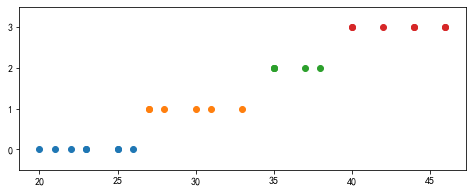

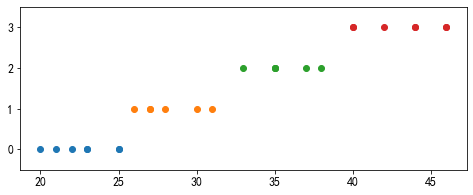

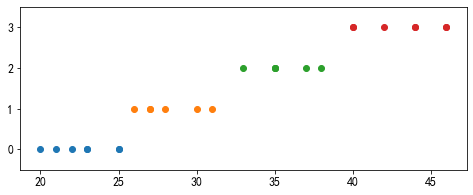

In [4]:
# （一维）聚类离散化
from sklearn.cluster import KMeans # 引入KMeans
kmodel = KMeans(n_clusters = k, n_jobs = 4)
kmodel.fit(np.array(data).reshape((len(data), 1))) # 训练模型
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0) # 输出聚类中心，并且排序
w = c.rolling(2).mean() # 相邻两项求中点，作为边界点
w = w.dropna()
w = [0] + list(w[0]) + [data.max()] # 把首末边界点加上
d3 = pd.cut(data, w, labels = range(k))
# 自定义作图函数来显示聚类结果
def cluster_plot(d, k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False # 用于正常显示负号
    plt.figure(figsize=(8, 3))
    for j in range(0, k):
        plt.plot(data[d==j], [j for i in d[d==j]], 'o')
    plt.ylim(-0.5, k-0.5)
    plt.rc('font', size=12)
    return plt
cluster_plot(d1, k).show()
cluster_plot(d2, k).show()
cluster_plot(d3, k).show()

In [5]:
# 独热编码
from sklearn import preprocessing
# 将属性进行整数编码
enc = preprocessing.OneHotEncoder()
enc.fit([[0, 0, 3], [1, 2, 0], [0, 1, 1], [1, 0, 2]]) # 采用fit()方法进行训练
# 对数据进行编码
print('[0, 0, 0]独热编码结果为：\n', enc.transform([[0, 0, 0]]).toarray(), '\n',
'[0, 1, 2]独热编码结果为：\n', enc.transform([[0, 1, 2]]).toarray(), '\n',
'[1, 2, 3]独热编码结果为：\n', enc.transform([[1, 2, 3]]).toarray())

[0, 0, 0]独热编码结果为：
 [[1. 0. 1. 0. 0. 1. 0. 0. 0.]] 
 [0, 1, 2]独热编码结果为：
 [[1. 0. 0. 1. 0. 0. 0. 1. 0.]] 
 [1, 2, 3]独热编码结果为：
 [[0. 1. 0. 0. 1. 0. 0. 0. 1.]]


In [6]:
meal = pd.read_excel('meal.xlsx')
df1 = meal.iloc[:, :5] # 取出meal 的前5 列数据
df2 = meal.iloc[:, 5:] # 取出meal 的后4 列数据
print('df1 的大小为%s，df2 的大小为%s。'%(df1.shape, df2.shape))
print('外连接合并后的表大小为：', pd.concat([df1, df2],axis=1, join='outer').shape)
print('内连接合并后的表大小为：', pd.concat([df1, df2],axis=1, join='inner').shape)

df1 的大小为(32, 5)，df2 的大小为(32, 4)。
外连接合并后的表大小为： (32, 9)
内连接合并后的表大小为： (32, 9)


In [7]:
# 纵向堆叠
df3 = meal.iloc[:10, :] # 取出meal 前10 行数据
df4 = meal.iloc[10:, :] # 取出meal 第10 行后的数据
print('df3 的大小为%s，df4 的大小为%s。'%(df3.shape, df4.shape))
print('外连接横向合并后的表大小为：',pd.concat([df3, df4],axis=1, join='outer').shape)
print('内连接横向合并后的表大小为：',pd.concat([df3, df4],axis=1, join='inner').shape)

df3 的大小为(10, 9)，df4 的大小为(22, 9)。
外连接横向合并后的表大小为： (32, 18)
内连接横向合并后的表大小为： (0, 18)


In [8]:
# 使用append 方法进行纵向表堆叠
print('堆叠前df3 的大小为%s，df4 的大小为%s。'%(df3.shape, df4.shape))
print('append 纵向堆叠后的表大小为：', df3.append(df4).shape)

堆叠前df3 的大小为(10, 9)，df4 的大小为(22, 9)。
append 纵向堆叠后的表大小为： (32, 9)


In [9]:
# 主键合并数据--merge 函数进行合并
info = pd.read_csv('info.csv', sep=',', encoding='gb18030') # 读取菜品信息表
# 将info_id 转换为字符串格式，为合并做准备
info['info_id'] = info['info_id'].astype('str')
meal['order_id'] = meal['order_id'].astype('str')
# 菜品详情表和菜品信息表都有订单编号
# 在菜品详情表中为order_id，在菜品信息表中为info_id
order_detail = pd.merge(meal, info, left_on='order_id', right_on='info_id')
print('meal 的原始形状为：', meal.shape)
print('info 的原始形状为：', info.shape)
print('主键合并后的形状为：', order_detail.shape)

meal 的原始形状为： (32, 9)
info 的原始形状为： (16, 12)
主键合并后的形状为： (27, 21)


In [10]:
# 使用join 方法进行主键合并
info.rename(columns={'info_id': 'order_id'}, inplace=True)
meal['order_id'] = meal['order_id'].astype('int')
order_detail1 = meal.join(info, on='order_id', rsuffix='1')
print('meal 的原始形状为：', meal.shape)
print('info 的原始形状为：', info.shape)
print('join 合并后的形状为：', order_detail1.shape)

meal 的原始形状为： (32, 9)
info 的原始形状为： (16, 12)
join 合并后的形状为： (32, 21)
